# Cosine similarity Application

We begin by loading our helper script before applying the cosine similarity

In [53]:
import os, sys
%load_ext autoreload
%autoreload 2

src = '/Users/richardlastrucci/Library/Mobile Documents/com~apple~CloudDocs/University/Honours/Semester 2/COS 781/project/src'
sys.path.append(src)
import helper as h

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import pandas as pd 

path = '/Users/richardlastrucci/Library/Mobile Documents/com~apple~CloudDocs/University/Honours/Semester 2/COS 781/project/data/application'

### load the utility matrix

In [55]:
df = pd.read_csv(f'{path}/train.csv')
utility_matrix = df
utility_matrix.shape

(1700, 44)

### compute & visualise cosine similarity matrix

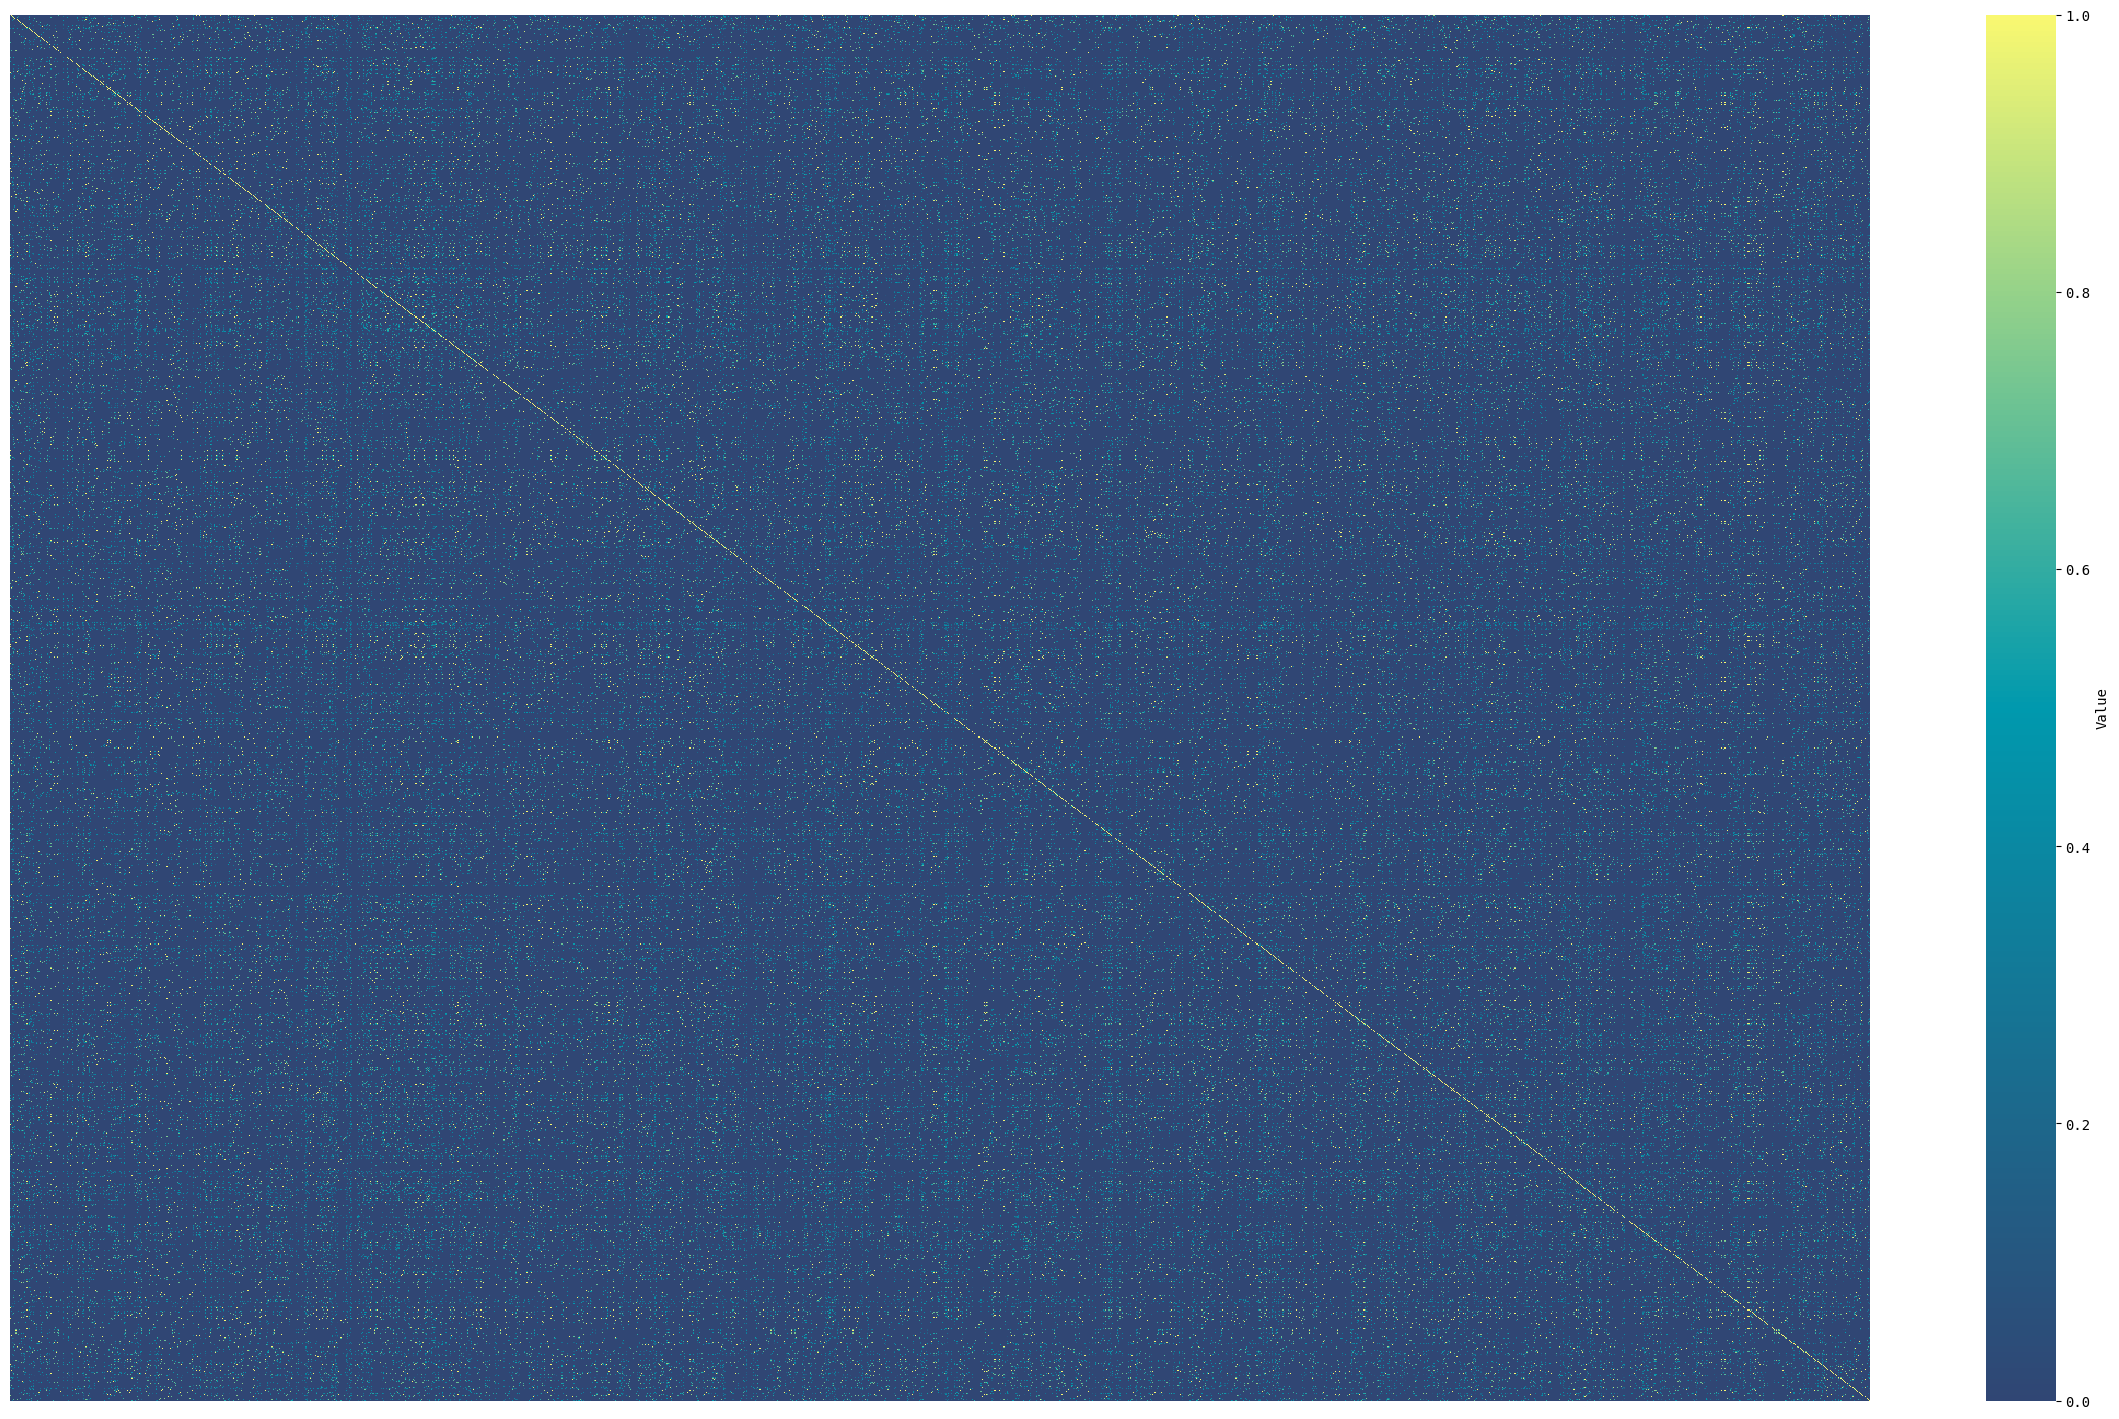

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

user_cosine_similarity = cosine_similarity(utility_matrix)

user_similarity_df = pd.DataFrame(user_cosine_similarity, index=utility_matrix.index, columns=utility_matrix.index)

h.plot_large_heatmap(user_similarity_df)

### Predict & visualise the utility matrix 

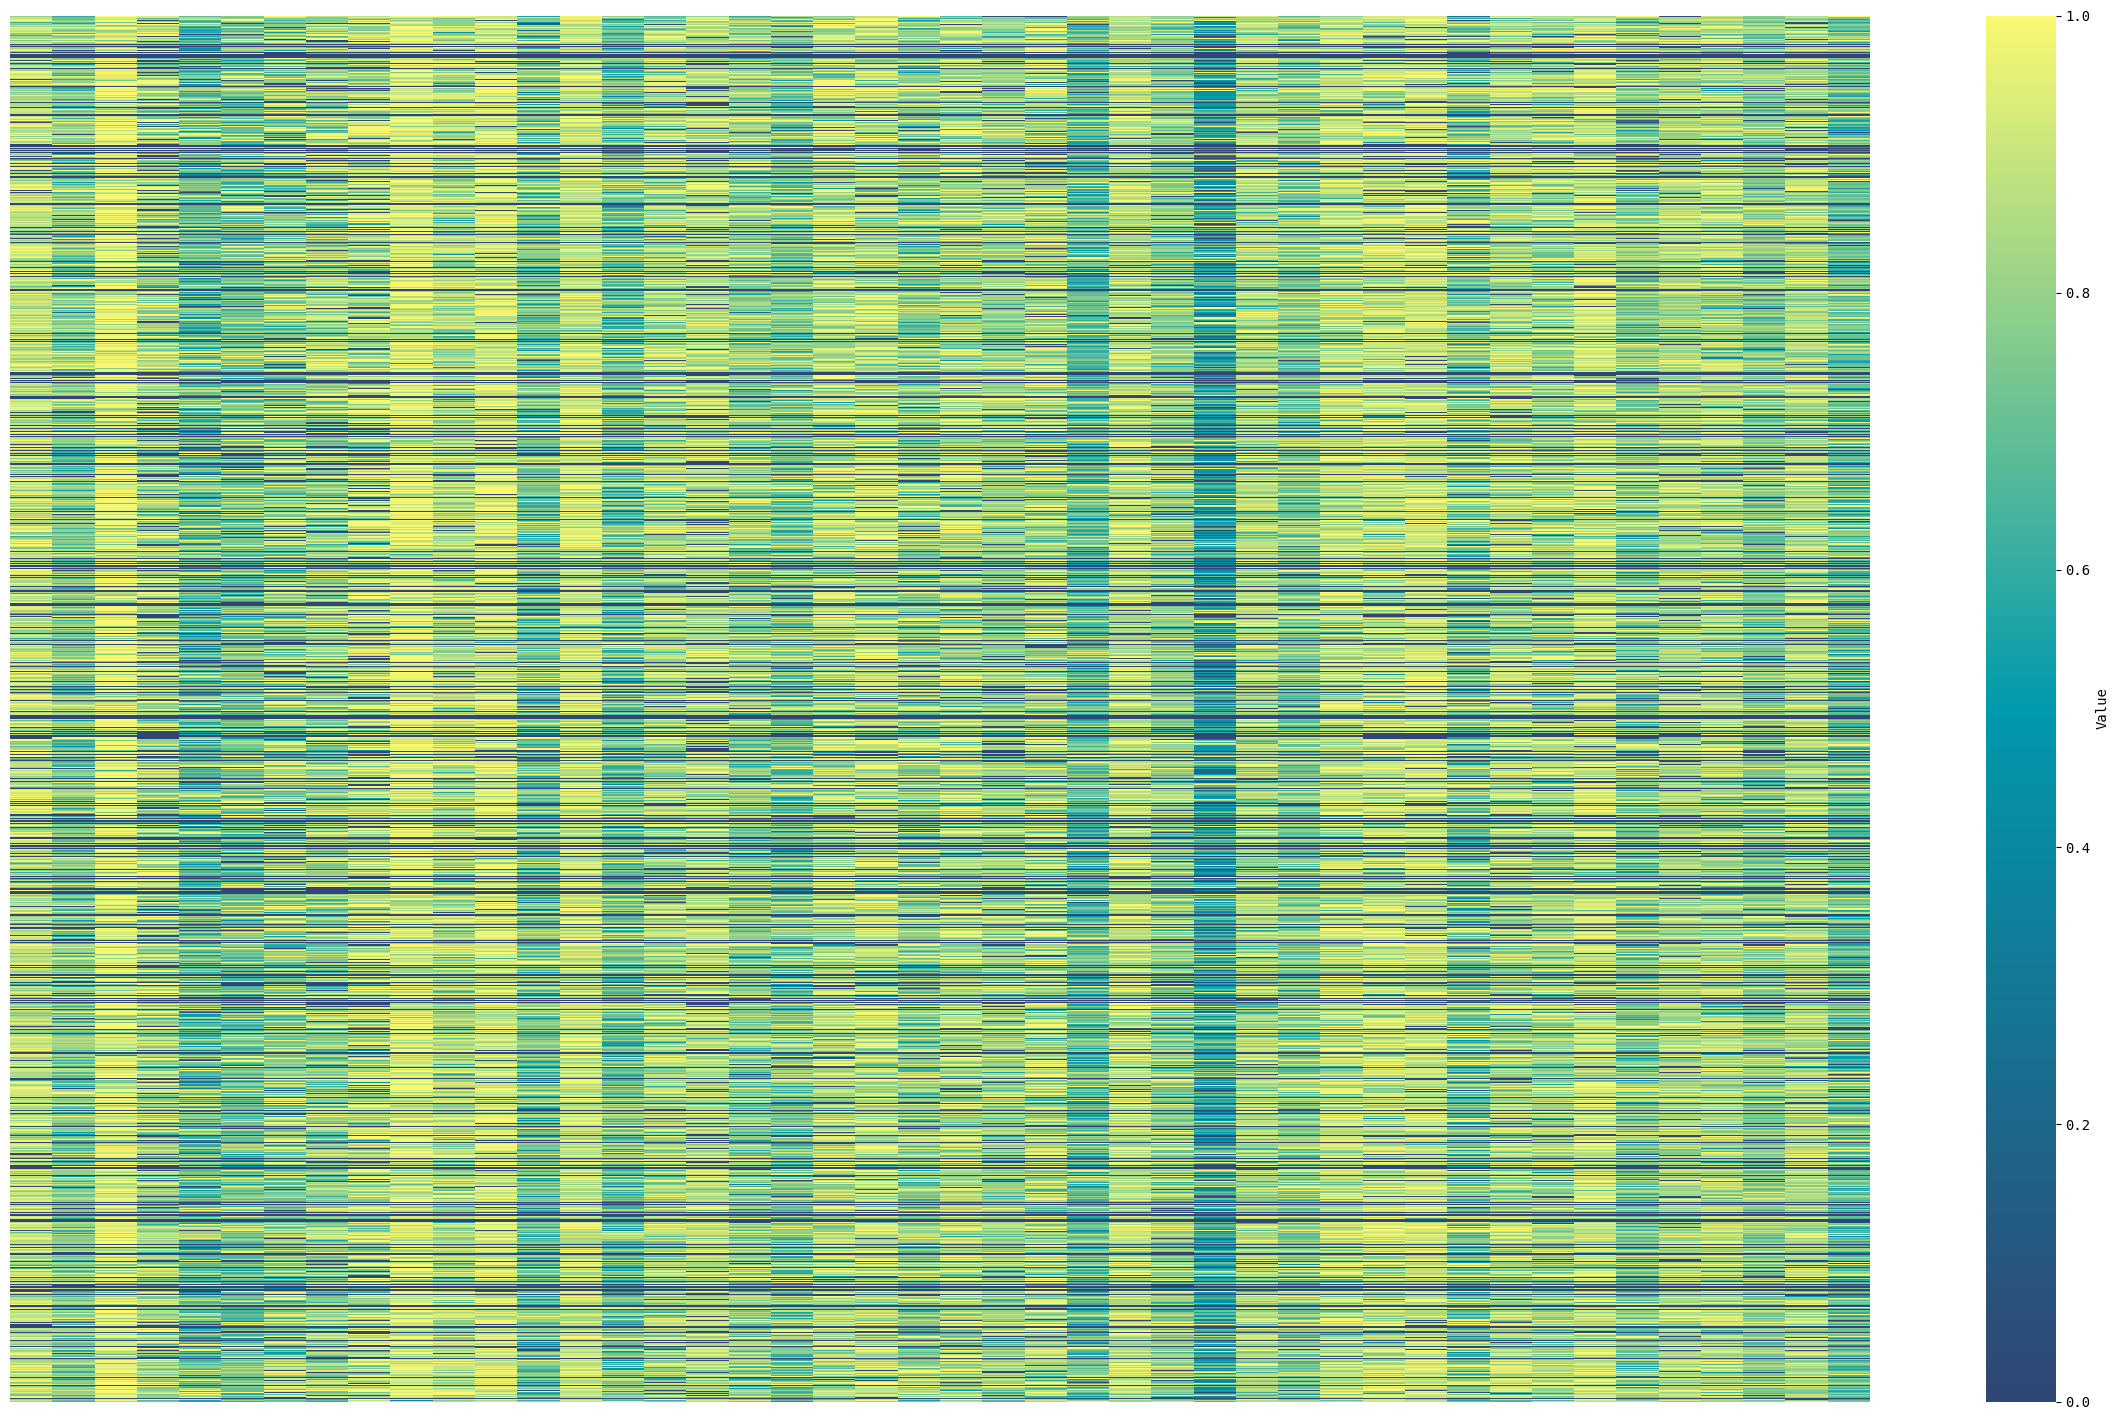

In [57]:
filled_matrix = utility_matrix.copy()
k = 5
for user in utility_matrix.index:
    for item in utility_matrix.columns:
        if utility_matrix.loc[user, item] == 0:
            neighbors = user_similarity_df.loc[user]
            
            # Get top k neighbors who have rated the item
            rated_neighbors = neighbors[utility_matrix[item] > 0]
            top_k_neighbors = rated_neighbors.nlargest(k)  # Select top k
            if top_k_neighbors.empty:
                continue
                
            numerator = sum(top_k_neighbors * utility_matrix.loc[top_k_neighbors.index, item])
            denominator = sum(abs(top_k_neighbors))
            
            if denominator > 0:
                predicted_rating = numerator / denominator
                filled_matrix.loc[user, item] = predicted_rating

h.plot_large_heatmap(filled_matrix)


In [58]:
test = pd.read_csv(f'{path}/test.csv')
test.shape

(732, 3)

### compute RMSE

In [59]:
import numpy as np
squared_error_sum = 0
n = len(test)


for _, row in test.iterrows():
    r, c, v = int(row['r']), int(row['c']), row['v']
    
    predicted_value = filled_matrix.iloc[r, c]
    squared_error_sum += (v - predicted_value) ** 2
rmse = np.sqrt(squared_error_sum / n)
rmse

np.float64(0.45502179617829996)